In [22]:
import pandas as pd
import matplotlib.pyplot as plt
# pip install matplotlib

In [2]:
df_raw= pd.read_csv("population_total.csv")

In [3]:
df_raw.head()

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09


# 1. Making a pivot Table

.pivot(): Returns a reshaped DataFrame organized by given index/column values ("pivot without aggregation")

In [4]:
# dropping null values
df_raw.dropna(inplace=True)

In [5]:
df_pivot = df_raw.pivot(index="year",columns="country", values="population")

In [6]:
df_pivot = df_pivot[["United States","India","China", "Indonesia", "Brazil"]]

In [7]:
df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


# 2. Lineplot

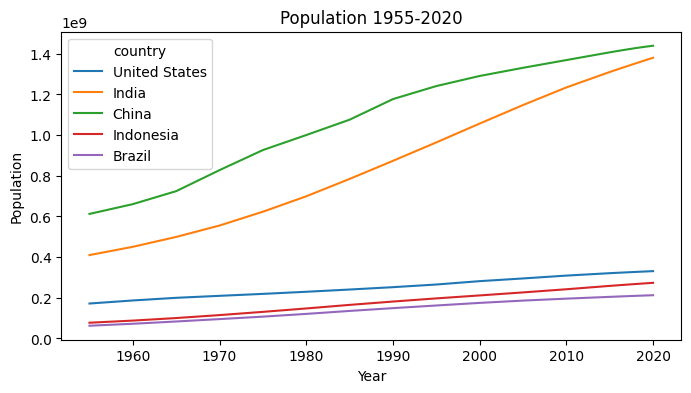

In [24]:
df_pivot.plot(kind="line", 
              xlabel="Year", 
              ylabel="Population", 
              title="Population 1955-2020", 
              figsize=(8,4))

# save plot
plt.savefig("my_test.png")
#show plot
plt.show()

In [25]:
df_pivot.to_excel("pivot_table.xlsx")

# 3. Barplot

#### Single Barplot


In [9]:
# selecting only one year (2020)
df_pivot_2020=df_pivot[df_pivot.index.isin([2020])]

In [10]:
df_pivot_2020

country,United States,India,China,Indonesia,Brazil
year,,,,,
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


In [11]:
# in barplot we need to put text data in the index
# Transpose a dataframe drom rows to column and viceversa
df_pivot_2020 = df_pivot_2020.T

<Axes: title={'center': 'Population 2020'}, xlabel='Year', ylabel='Population'>

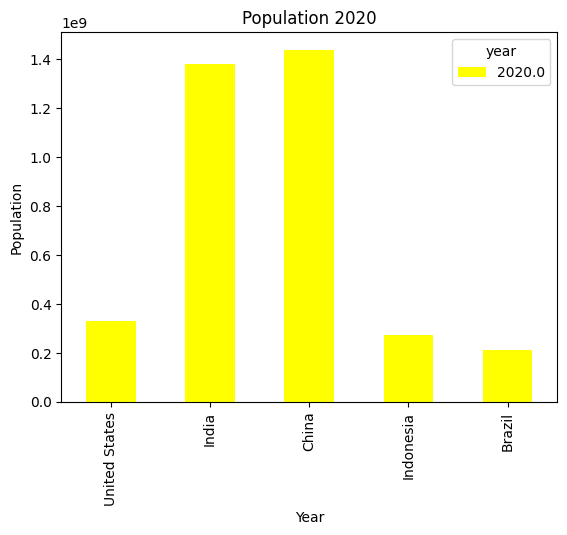

In [12]:
df_pivot_2020.plot(kind="bar", 
                    color="yellow",
                    xlabel="Year", ylabel="Population",
                    title="Population 2020")

#### Barplot grouped by n variables

In [13]:
df_pivot_multiYear = df_pivot[df_pivot.index.isin([2015,2016, 2017, 2018, 2019, 2020])]

<Axes: xlabel='Year', ylabel='Population'>

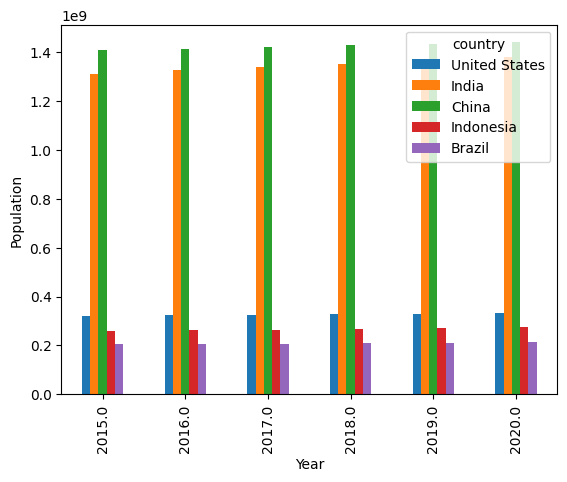

In [14]:
df_pivot_multiYear.plot(kind="bar",
                       xlabel="Year", ylabel="Population")

# 4. Piechart

In [15]:
# changing column name
df_pivot_2020 = df_pivot_2020.rename(columns={2020:"2020"})

<Axes: title={'center': 'Population 2020'}, ylabel='2020'>

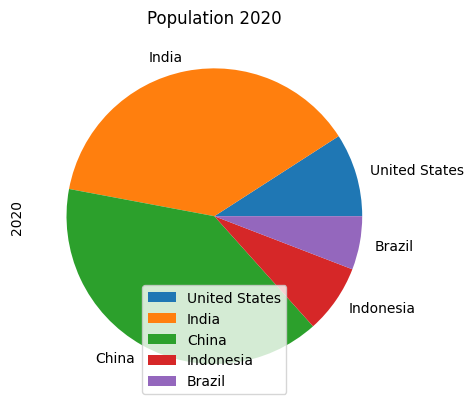

In [16]:
df_pivot_2020.plot(kind="pie", 
                   y="2020",
                   title="Population 2020")

# 5. Boxplot

#### Single Boxplot

<Axes: ylabel='Population'>

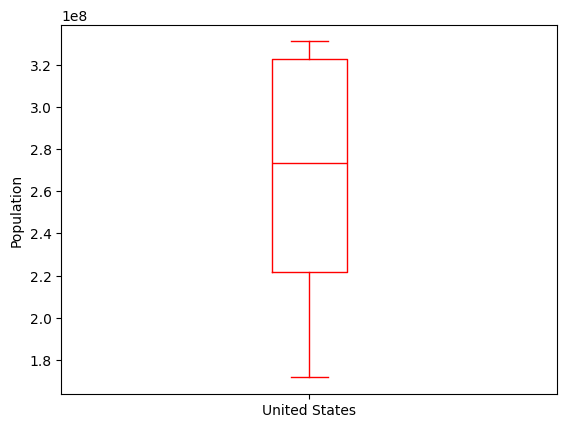

In [17]:
df_pivot["United States"].plot(kind="box", color="red", ylabel="Population")

#### Multiple Boxplot

<Axes: ylabel='Population'>

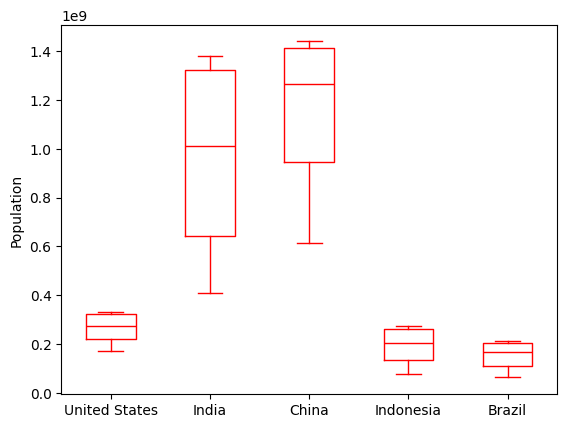

In [18]:
df_pivot.plot(kind="box", color="red", ylabel="Population")

# 6. Histogram

<Axes: ylabel='Frequency'>

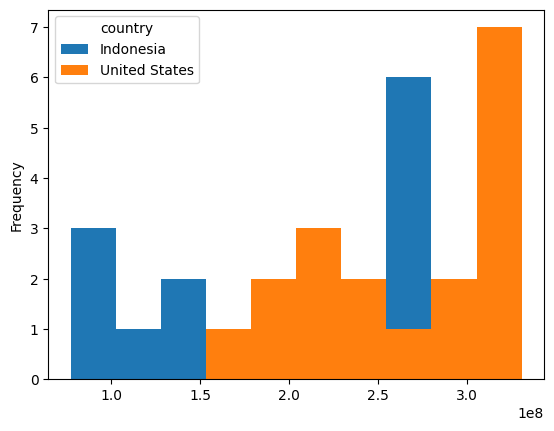

In [19]:
df_pivot[["Indonesia", "United States"]].plot(kind="hist")

# 7. ScatterPlot

In [20]:
df_sample = df_raw[df_raw["country"].isin(["United States", "India", "China", "Indonesia", "Brazil"])]

<Axes: xlabel='year', ylabel='population'>

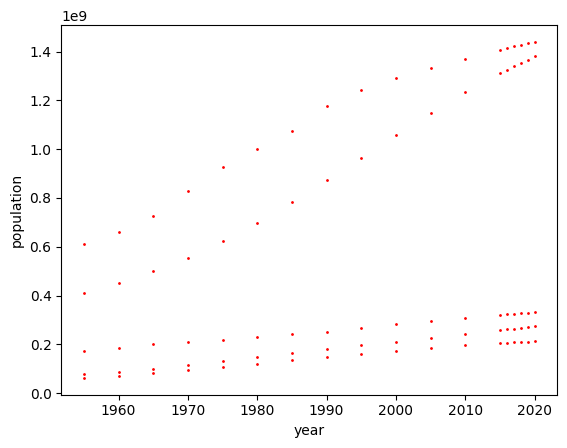

In [21]:
df_sample.plot(kind="scatter", 
              x= "year",
              y= "population",
              s= 1,
              color="red")